<a href="https://colab.research.google.com/github/kimyt1976/AI-Programming/blob/main/%ED%95%B4%EC%96%91%EB%8C%8011%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2258 - accuracy: 0.9354
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0920 - accuracy: 0.9725
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0605 - accuracy: 0.9812
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0430 - accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0321 - accuracy: 0.9903
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0262 - accuracy: 0.9914
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0190 - accuracy: 0.9942
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0159 - accuracy: 0.9950
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0129 - accuracy: 0.9961
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.01

Saving num4img.png to num4img (5).png
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255  12 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255  94 249 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255   3 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 254 227 255 2

4

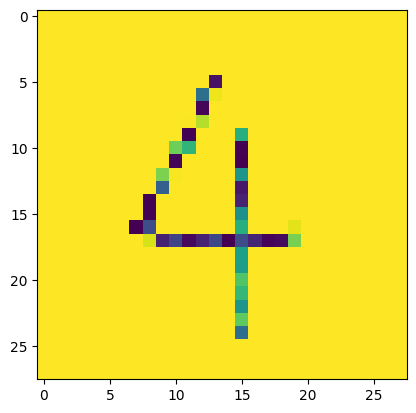

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

model = keras.Sequential([
  keras.layers.Flatten(input_shape =(28, 28)),
  keras.layers.Dense(256, activation = 'relu'),
  #keras.layers.Dense (128, activation = 'relu'),
  #keras.layers.Dense (100, activation = 'relu'),
  keras.layers.Dense (10, activation = 'softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
train_images, test_images = train_images / 255, test_images / 255
model.fit(train_images , train_labels , epochs=10, verbose=1)
test_loss, test_acc = model.evaluate(test_images , test_labels , verbose=0)
print(test_acc)

#--------------------------------------------------------------------------

#자신이 그림판을 이용해서 4 라는 숫자 이미지 파일
#(num4img.png) 를 만든다

from google.colab import files
uploaded = files.upload()
#[파일선택 ]]--'num4img.png' 를 구글드라이브에 upload 한다
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread ('./num4img.png')
plt.imshow(img)

import cv2
img = cv2.imread('./num4img.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img , (28,28))
plt.imshow(img)

import numpy as np
#pred = model.predict(img[np.newaxis, :, :])
#pred
#pred.argmax

#--------------------------------------- 소스 추가
#두번만에 성공하였습니다.
#실패한 이유는 배경이 255로 되어져있어서 문제가 됨
#배경 이미지 색상을 반전 시킨후 정상 동작함.

for i in range(28):
  for j in range(28):
    print('{:4d}'.format(img[i][j]), end='')
  print()

img = (255 - img) / 255
pred = model.predict(img[np.newaxis, :, :])
pred.argmax()
